In [1]:
# from google.colab import files, drive

In [3]:
# up = files.upload()

In [4]:
# drive.mount('/content/drive')

## import dataset

In [8]:
import pandas as pd
data = pd.read_csv('CO2EMISSIONS.csv')
data.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


## cleaning

In [10]:
# clean the data

## encoding

In [13]:
# encode the data

## define x, y

In [16]:
import numpy as np
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [26]:
print(x[:3])

[[2.  4.  8.5]
 [2.4 4.  9.6]
 [1.5 4.  5.9]]


In [28]:
x.shape

(1067, 3)

In [30]:
print(y[:3])

[196 221 136]


In [32]:
y.shape

(1067,)

## spliting

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [37]:
x_train.shape

(800, 3)

In [36]:
x_train[0].shape

(3,)

In [41]:
y_train.shape

(800,)

In [43]:
y_train[0].shape

()

## scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## create, compile and fit the model

### Sequential

In [52]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [54]:
model = Sequential([
    Input(shape=x_train[0].shape),      # (3,)
    Dense(400, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.2),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dropout(0.3),
    Dense(1)
])

# Note:
# If dropout is used, the number of epochs will increase significantly because learning will be slower.
# L1: It applies a penalty based on the absolute values of weights. This results in zero weights, effectively eliminating less important features.
# L2: It applies a penalty based on the square of the weights. This shrinks the weights but does not set them to zero.
# ElasticNet: combination of L1 and L2
# you can use this code for Elastic Net: kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,801 (163.29 KB)

 Trainable params: 41,801 (163.29 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(
    optimizer='adam',  # tf.keras.optimizers.Adam()
    loss='mse',        # keras.losses.MeanSquaredError()
    metrics=['mae']
)

# The default optimizer should be Adam. If the model fails to converge or becomes overfitted, switch to SGD.
# however, SGD requires manual configuration.

In [92]:
r = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1124.9015 - mae: 25.0010 - val_loss: 344.5381 - val_mae: 10.2015
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1049.7272 - mae: 24.1272 - val_loss: 413.4681 - val_mae: 12.4275
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1040.4183 - mae: 23.7592 - val_loss: 395.2196 - val_mae: 11.8965
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1060.0138 - mae: 24.0954 - val_loss: 365.1718 - val_mae: 10.2960
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1035.7141 - mae: 23.4361 - val_loss: 356.9016 - val_mae: 9.9285
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1062.0603 - mae: 24.1424 - val_loss: 352.1178 - val_mae: 10.6101
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1039.5996 - mae: 23.5904 - val_loss: 348.2265 - val_mae: 10.8902
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1095.4730 - mae: 24.6645 - val_loss: 375.1985 - val_mae: 10.9448
Epoch 9/1

### Functional API

In [63]:
# from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras import regularizers

In [65]:
# i = Input(shape=x_train[0].shape)
# X = Dense(400, activation='relu', kernel_regularizer=regularizers.l1(0.01))(i)
# X = Dropout(0.02)(X)
# X = Dense(100, activation='relu', kernel_regularizer=regularizers.l1(0.01))(X)
# X = Dropout(0.03)(X)
# X = Dense(1)(X)

# model = Model(i, X)

In [67]:
# model.summary()

## visualizing

In [70]:
import matplotlib.pyplot as plt

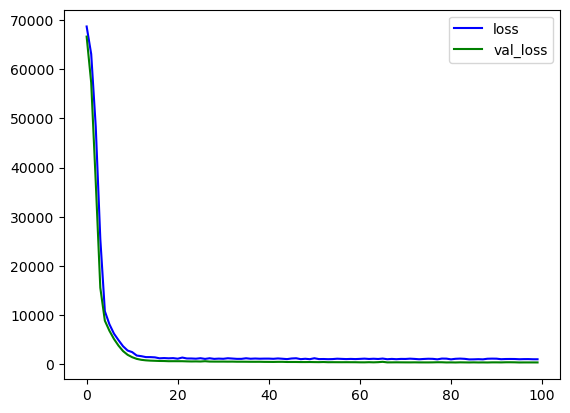

In [72]:
plt.plot(r.history['loss'], label='loss', color='blue')
plt.plot(r.history['val_loss'], label='val_loss', color='green')
plt.legend()

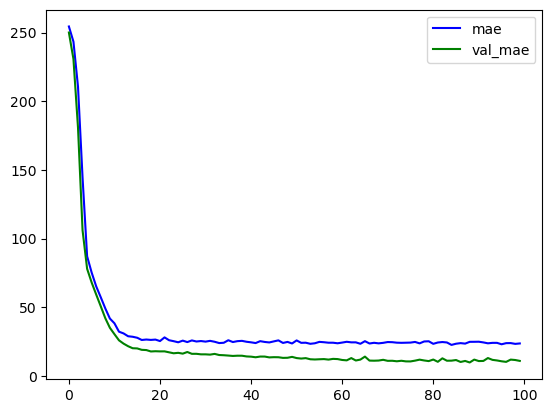

In [74]:
plt.plot(r.history['mae'], label='mae', color='blue')
plt.plot(r.history['val_mae'], label='val_mae', color='green')
plt.legend()

## evaluate the model

In [77]:
print(y_test[:5])
print(model.predict(x_test)[:5].flatten())
print('-------------------------------')
print(model.predict(x_test)[:5])

[304 221 294 221 207]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
[310.2121  230.09285 280.74225 229.63667 210.48367]
-------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[310.2121 ]
 [230.09285]
 [280.74225]
 [229.63667]
 [210.48367]]


In [79]:
from sklearn.metrics import r2_score
yhat_test = model.predict(x_test)
print(f"R2_Score: {r2_score(y_test, yhat_test)}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R2_Score: 0.9257055521011353


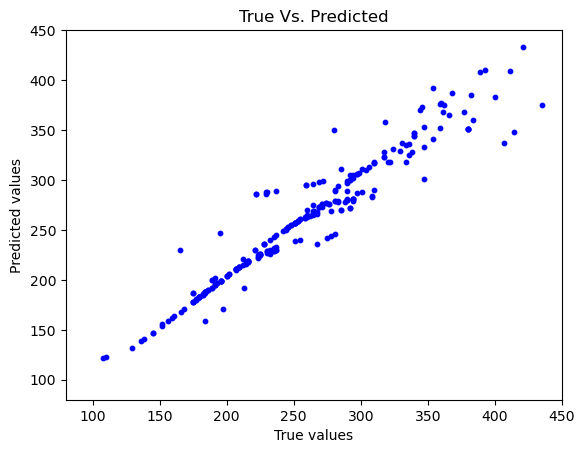

In [81]:
plt.scatter(y_test, yhat_test, s=10, color='blue')
plt.xlim(80, 450)
plt.ylim(80, 450)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True Vs. Predicted')
plt.show()

## predict new data

In [84]:
new_data = sc.transform([[2, 4, 8.5]])  # Use the same MinMaxScaler fitted earlier
print(model.predict(new_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[199.22626]]


## save the model

In [87]:
# model.save('mlp_regression.keras')

## load the model

In [90]:
# model = tf.keras.models.load_model('mlp_regression.keras')